# XAI CODE DEMO

## Explainable AI Specialization on Coursera

If you experience high latency while running this notebook, you can open it in Google Colab:

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/explainable-machine-learning/interpretable-ml/blob/main/regression_interpretability.ipynb)

# Regression for Interpretability

* Linear Regression: The coefficients directly show the impact of each feature on the target variable
* Ridge Regression: Similar to linear regression, but with regularization to handle multicollinearity
* Lasso Regression: Performs feature selection by setting some coefficients to zero

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

We will use the California Housing dataset [LINK](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html)

In [5]:
# Load the California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    for feature, coef in zip(X.columns, model.coef_):
      print(f"{feature}: {coef:.4f}")

    return model, y_pred

In [7]:
# Fit models
lr_model, lr_pred = evaluate_model(LinearRegression(), X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression")
ridge_model, ridge_pred = evaluate_model(Ridge(alpha=1.0), X_train_scaled, X_test_scaled, y_train, y_test, "Ridge Regression")
lasso_model, lasso_pred = evaluate_model(Lasso(alpha=0.1), X_train_scaled, X_test_scaled, y_train, y_test, "Lasso Regression")


Linear Regression:
MSE: 0.56
R2 Score: 0.58
MedInc: 0.8544
HouseAge: 0.1225
AveRooms: -0.2944
AveBedrms: 0.3393
Population: -0.0023
AveOccup: -0.0408
Latitude: -0.8969
Longitude: -0.8698

Ridge Regression:
MSE: 0.56
R2 Score: 0.58
MedInc: 0.8543
HouseAge: 0.1226
AveRooms: -0.2942
AveBedrms: 0.3390
Population: -0.0023
AveOccup: -0.0408
Latitude: -0.8962
Longitude: -0.8691

Lasso Regression:
MSE: 0.68
R2 Score: 0.48
MedInc: 0.7106
HouseAge: 0.1065
AveRooms: -0.0000
AveBedrms: 0.0000
Population: -0.0000
AveOccup: -0.0000
Latitude: -0.0115
Longitude: -0.0000


### Coefficient Comparison Plot

This bar plot compares the coefficients of Linear Regression, Ridge, and Lasso models side by side. It helps visualize how regularization in Ridge and Lasso affects the coefficient values compared to standard linear regression.

<Figure size 1200x600 with 0 Axes>

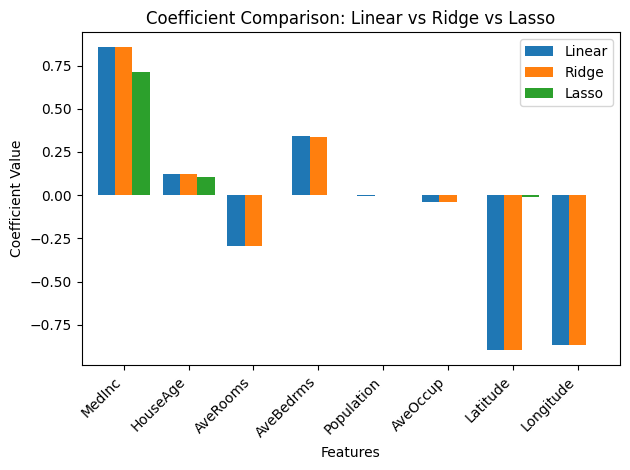

In [8]:
# Coefficient Comparison Plot
def plot_coefficients(lr_model, ridge_model, lasso_model):
    coef_df = pd.DataFrame({
        'Linear': lr_model.coef_,
        'Ridge': ridge_model.coef_,
        'Lasso': lasso_model.coef_
    }, index=X.columns)

    plt.figure(figsize=(12, 6))
    coef_df.plot(kind='bar', width=0.8)
    plt.title('Coefficient Comparison: Linear vs Ridge vs Lasso')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.legend(loc='best')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_coefficients(lr_model, ridge_model, lasso_model)


### Residual Plot

This scatter plot shows the residuals (differences between actual and predicted values) against the predicted values. It helps identify any patterns in the errors, which could indicate issues with the model's assumptions or fit.

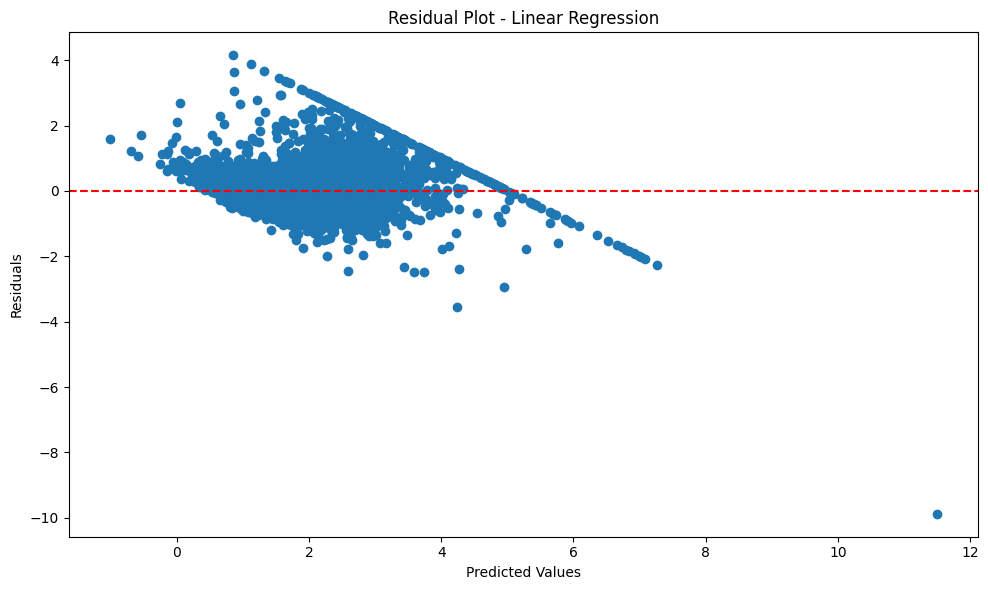

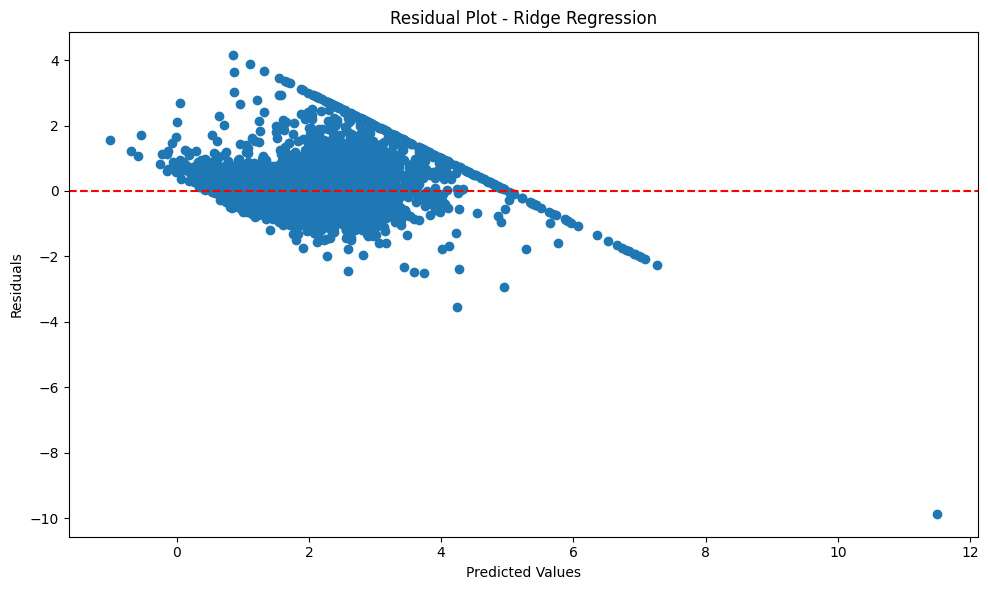

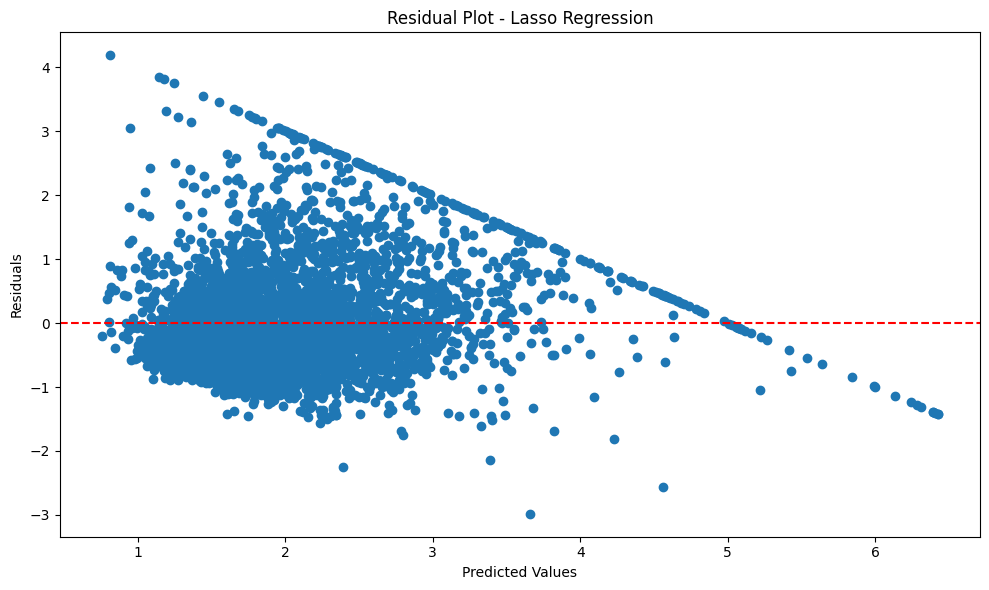

In [25]:
# Residual Plot
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {model_name}')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()

plot_residuals(y_test, lr_pred, 'Linear Regression')
plot_residuals(y_test, ridge_pred, 'Ridge Regression')
plot_residuals(y_test, lasso_pred, 'Lasso Regression')



### Actual vs. Predicted Plot

This scatter plot compares the actual target values with the model's predictions. The red dashed line represents perfect predictions. The spread of points around this line gives an idea of the model's accuracy.

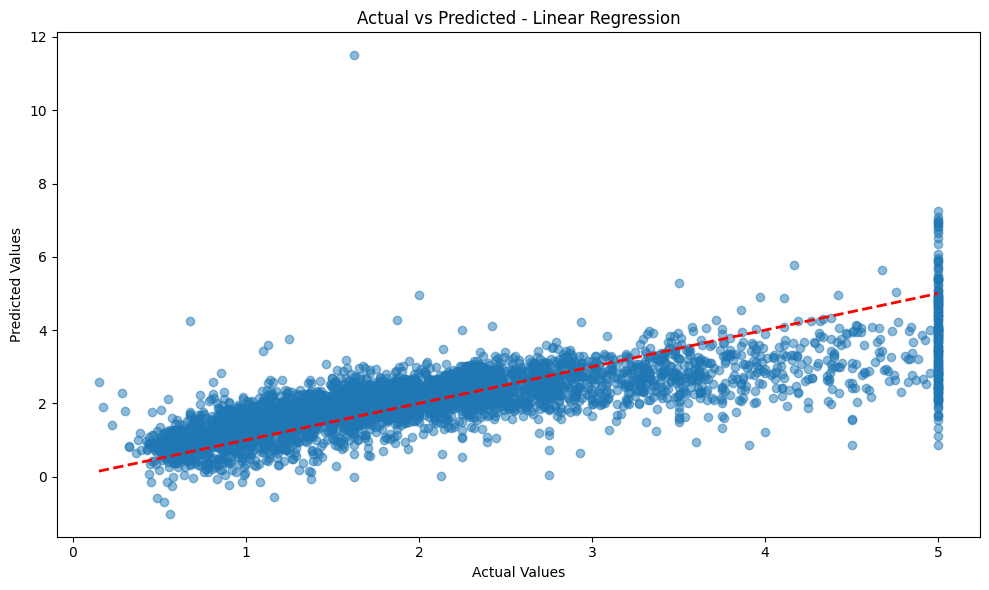

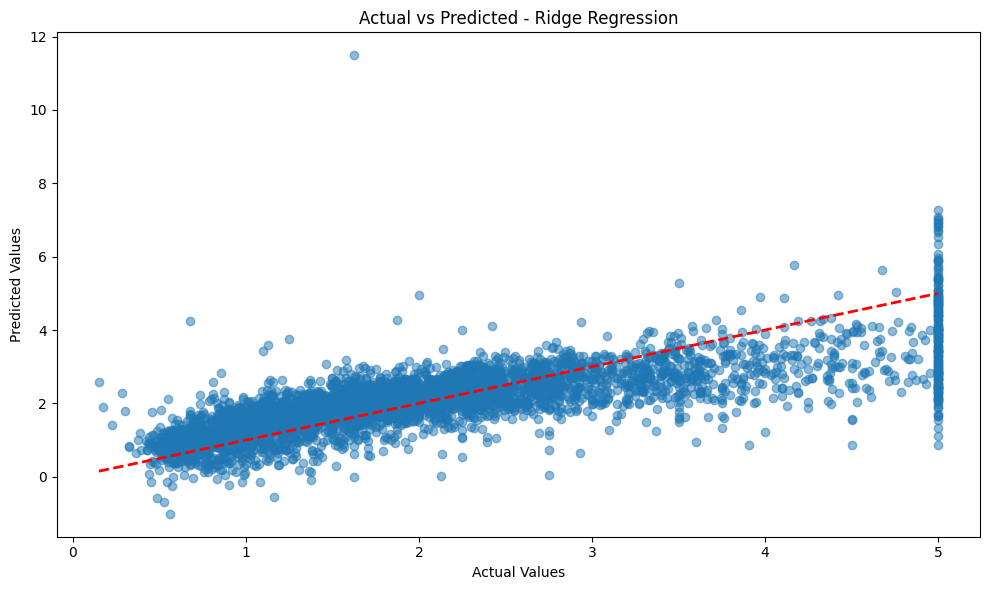

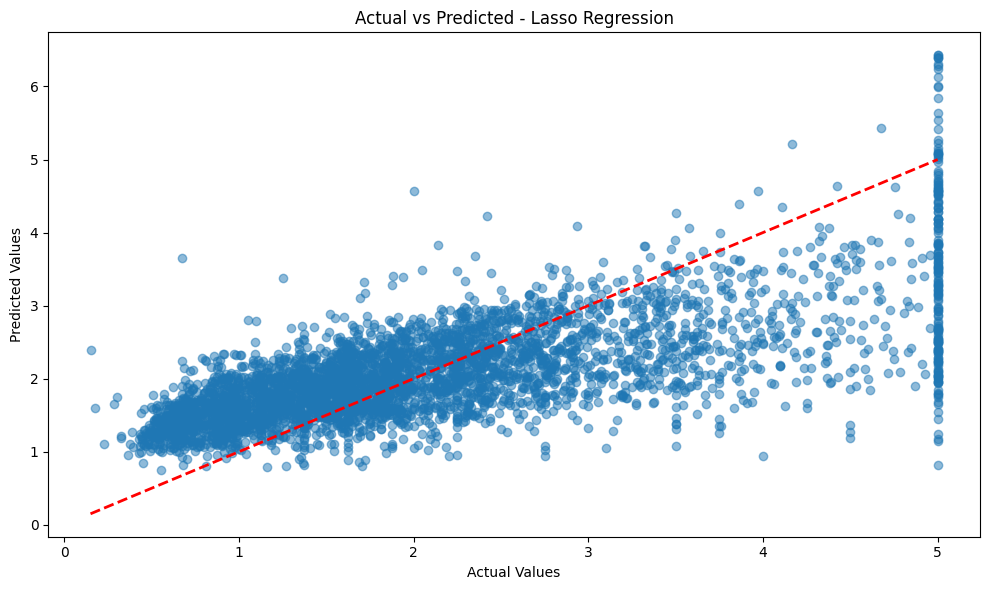

In [24]:
# Actual vs Predicted Plot
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_test, lr_pred, 'Linear Regression')
plot_actual_vs_predicted(y_test, ridge_pred, 'Ridge Regression')
plot_actual_vs_predicted(y_test, lasso_pred, 'Lasso Regression')


### Feature Importance Heatmap

This heatmap visualizes the absolute values of coefficients across all three models. It provides a quick way to compare feature importances between models and identify which features have the strongest impact on predictions.

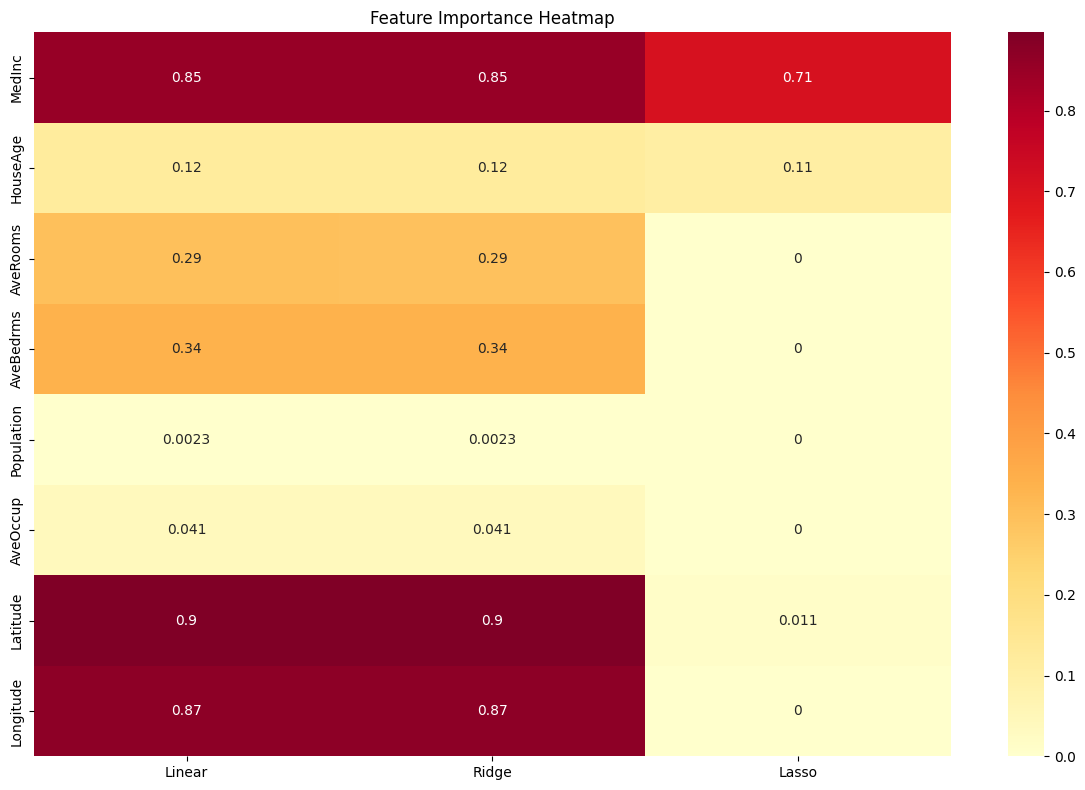

In [ ]:
# Feature Importance Heatmap
def plot_feature_importance_heatmap(lr_model, ridge_model, lasso_model):
    importance_df = pd.DataFrame({
        'Linear': np.abs(lr_model.coef_),
        'Ridge': np.abs(ridge_model.coef_),
        'Lasso': np.abs(lasso_model.coef_)
    }, index=X.columns)

    plt.figure(figsize=(12, 8))
    sns.heatmap(importance_df, annot=True, cmap='YlOrRd')
    plt.title('Feature Importance Heatmap')
    plt.tight_layout()
    plt.show()

plot_feature_importance_heatmap(lr_model, ridge_model, lasso_model)


### Lasso Regularization Path
This plot shows how Lasso coefficients change as the regularization strength (alpha) varies. It helps visualize which features are most resistant to being zeroed out by Lasso, indicating their importance to the model.

The x-axis represents -log(alpha), where alpha is the regularization parameter. As you move from left to right on the x-axis, you're looking at models with decreasing regularization strength (increasing -log(alpha) means decreasing alpha). The y-axis shows the coefficient values for each feature. Each line represents a different feature in your dataset. The path of each line shows how the coefficient for that feature changes as the regularization strength varies.

How to interpret:

* Entry points: The point where a line becomes non-zero (moving from left to right) indicates when that feature enters the model. Features that enter the model earlier (further to the left) are generally more important.
* Stability: Features whose coefficients remain relatively stable across a wide range of alpha values are typically more robust predictors.
* Coefficient magnitude: The vertical position of a line indicates the magnitude of the coefficient. Higher absolute values (further from zero) suggest a stronger impact on the target variable.
* Convergence: As you move to the right (very low regularization), the coefficients tend to converge to their ordinary least squares values (equivalent to standard linear regression).
* Zero coefficients: Lines that stay at zero for a large range of alpha values represent features that Lasso considers less important and are more likely to be excluded from the model.
* Crossing zero: If a line crosses the zero line, it indicates that the feature's relationship with the target variable changes direction (from positive to negative or vice versa) depending on the regularization strength.
* Grouping: Features whose lines follow similar paths might be correlated or have similar relationships with the target variable.


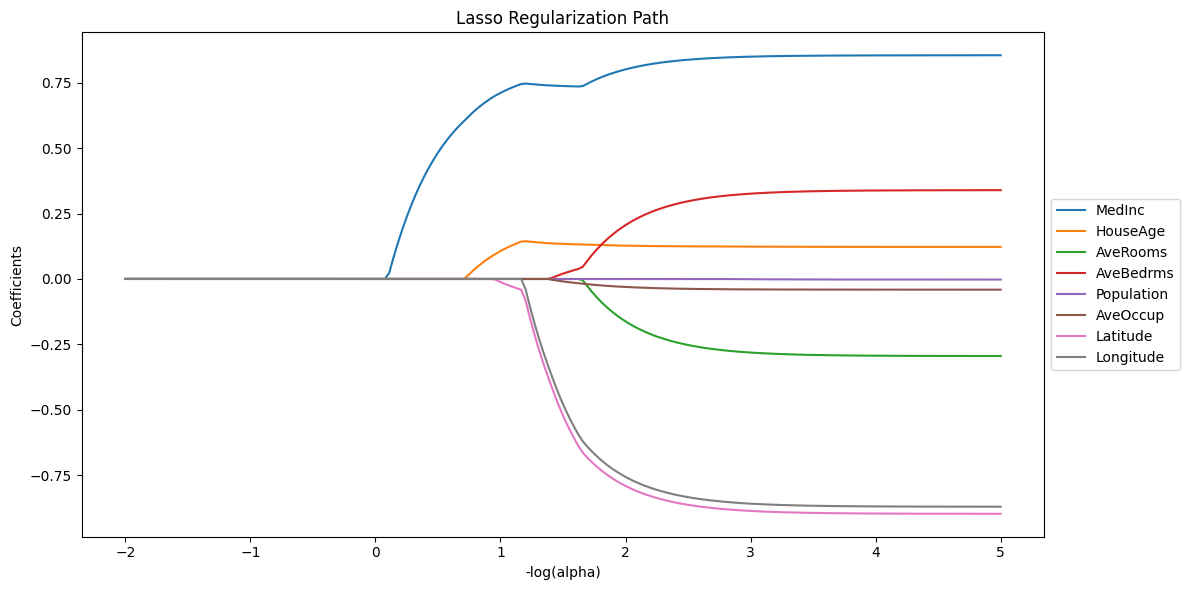

In [ ]:
# Regularization Path for Lasso
from sklearn.linear_model import lasso_path

def plot_lasso_path():
    alphas, coefs, _ = lasso_path(X_train_scaled, y_train, alphas=np.logspace(-5, 2, 200))
    plt.figure(figsize=(12, 6))
    for coef_path, feature in zip(coefs, X.columns):
        plt.plot(-np.log10(alphas), coef_path, label=feature)
    plt.xlabel('-log(alpha)')
    plt.ylabel('Coefficients')
    plt.title('Lasso Regularization Path')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

plot_lasso_path()